In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten
from keras.applications.vgg16 import VGG16


In [13]:
conv_base=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
)

In [14]:

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
conv_base.trainable=False

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
#  generators
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
    )
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [20]:
def process(image,label):
    image=tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [21]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [30]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.9937 - loss: 0.0165 - val_accuracy: 0.8998 - val_loss: 0.5073
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 759s 1s/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9068 - val_loss: 0.4955
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1944s 3s/step - accuracy: 0.9856 - loss: 0.0377 - val_accuracy: 0.9104 - val_loss: 0.4360
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9090 - val_loss: 0.4504
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9078 - val_loss: 0.4588
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 711s 1s/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9102 - val_loss: 0.4931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9048 - val_loss: 0.4940
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.9961 - loss: 0.0118 - val_acc

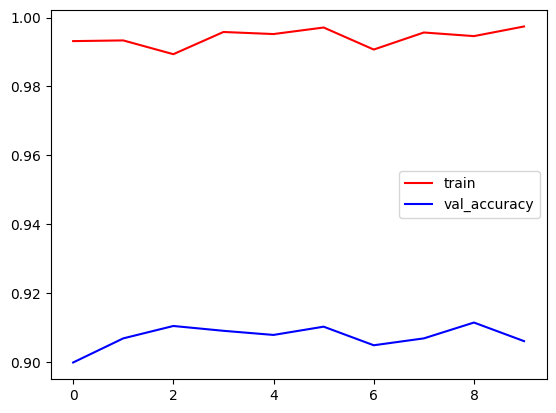

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()
plt.show()

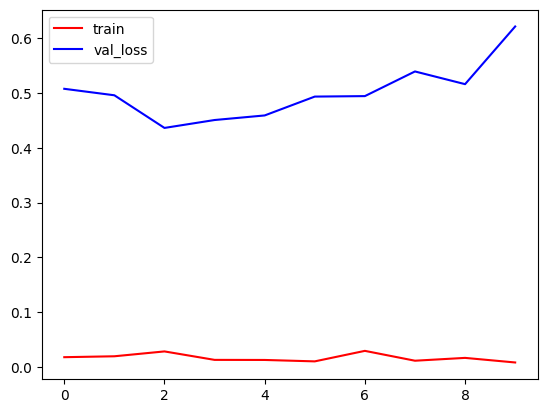

In [32]:
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="val_loss")
plt.legend()
plt.show()

In [33]:
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten,Dropout
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,943,937 (64.64 MB)

 Trainable params: 2,229,249 (8.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [36]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=8,validation_data=validation_ds)

Epoch 1/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 702s 1s/step - accuracy: 0.8003 - loss: 0.4196 - val_accuracy: 0.9024 - val_loss: 0.2331
Epoch 2/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 705s 1s/step - accuracy: 0.8847 - loss: 0.2728 - val_accuracy: 0.9066 - val_loss: 0.2276
Epoch 3/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 707s 1s/step - accuracy: 0.8977 - loss: 0.2439 - val_accuracy: 0.9078 - val_loss: 0.2111
Epoch 4/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 1765s 3s/step - accuracy: 0.9070 - loss: 0.2222 - val_accuracy: 0.9124 - val_loss: 0.2048
Epoch 5/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 3183s 5s/step - accuracy: 0.9108 - loss: 0.2139 - val_accuracy: 0.9052 - val_loss: 0.2198
Epoch 6/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 926s 1s/step - accuracy: 0.9227 - loss: 0.1910 - val_accuracy: 0.9132 - val_loss: 0.2099
Epoch 7/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 709s 1s/step - accuracy: 0.9239 - loss: 0.1859 - val_accuracy: 0.9162 - val_loss: 0.1969
Epoch 8/8
625/625 ━━━━━━━━━━━━━━━━━━━━ 707s 1s/step - accuracy: 0.9176 - loss: 0.1862 - val_accuracy: 

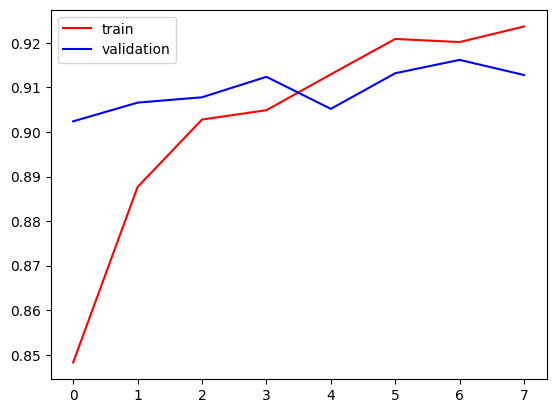

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

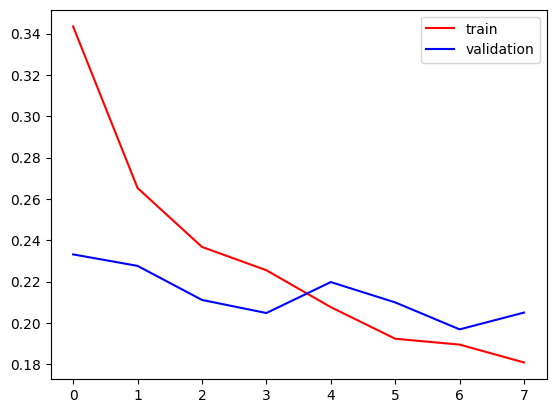

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [40]:
model.save('model.h5')

In [43]:
import pickle

# Save the training history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Save the model in .tf format
